In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from tqdm.notebook import tqdm
from sklearn.decomposition import PCA
import pickle

Fetch dataset from the net

In [3]:
X,y = fetch_openml('mnist_784', version=1, return_X_y=True)
y = y.astype(int)
X = X/255

/home/michele/.local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data display



In [4]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [6]:
def plot_digits(iter=15):
    
    fig, axs = plt.subplots(10,iter)
    
    for digit in range(10):
        for x in range(iter):
            digit_index = y[y == digit].index[x]

            digit_pixels = np.array(X.iloc[digit_index]).reshape(28, 28)
            axs[digit,x].imshow(digit_pixels)
            axs[digit,x].axis('off')
            

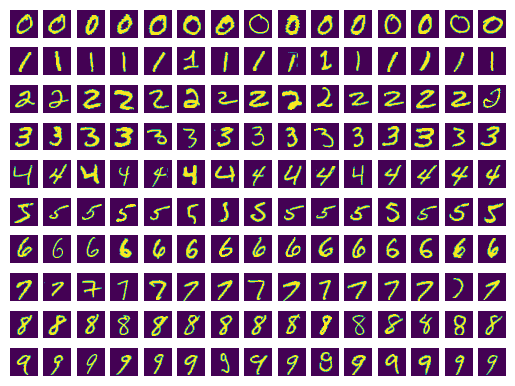

In [7]:
plot_digits()

PCA reduction

In [8]:
def PCA_dfs(max_pca_dim:int, percentage:float):
    """
    Function that:
    
    1) samples the initial dataset until the target "percentage" is reached.
    2) saves the sampled initial dataset to file.
    3) generates a set of PCA reduced datasets from 2 PCA dimensions to "max_pca_dim".
    4) save each reduced dataset to file (folder /dataset/) along with the PCA object (pca).
    
    Args:
        max_pca_dim (int): max PCA dimension to reach when generating the set of datasets.
        percentage (float): target percentage to reach when sampling the initial dataset.
    """
    
    #random state to ensure replicability
    r=np.random.RandomState(32)
    
    #index sampling
    indexes=r.choice(70000,int(70000*percentage),replace=False)
    
    #save sampled dataset to file
    X.iloc[indexes].to_parquet("dataset/X.parquet")
    y[indexes].to_frame().to_parquet("dataset/y.parquet")
    
    for i in tqdm(range(2,max_pca_dim+1,10)):
        
        #PCA object with target number of dimensions
        pca=PCA(n_components=i)
        
        #PCA reduced dataset for i target dimensions
        df=pd.DataFrame(pca.fit_transform(X),columns=["PC_"+str(x) for x in range(1,i+1)])
        
        #sample the same indexes as the initial dataset
        df=df.iloc[indexes]
        
        #save reduced dataset to file
        df.to_parquet("dataset/PCA_"+str(i)+".parquet")
        
        #save PCA object to file
        with open("pca/pca_"+str(i)+".pkl", 'wb') as out:
            pickle.dump(pca, out, pickle.HIGHEST_PROTOCOL)

PCA_dfs(200,0.5)

  0%|          | 0/20 [00:00<?, ?it/s]